In [1]:
import torch
from torch.autograd import Variable

from torch import nn

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(3)

## Without NN Module Training

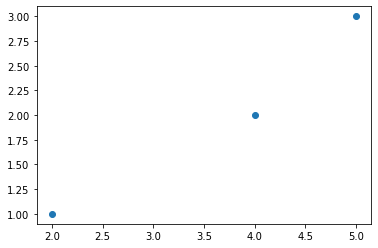

In [17]:
x_train = torch.Tensor([[2],[4],[5]])
y_train = torch.Tensor([[1],[2],[3]])

x, y = Variable(x_train), Variable(y_train)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [18]:
## Simple Linear Model

In [19]:
W= Variable(torch.randn(1,1))
W

tensor([[0.1748]])

In [20]:
x.mm(W)

tensor([[0.3497],
        [0.6993],
        [0.8742]])

In [21]:
cost_func=nn.MSELoss()

In [22]:
cost_func

MSELoss()

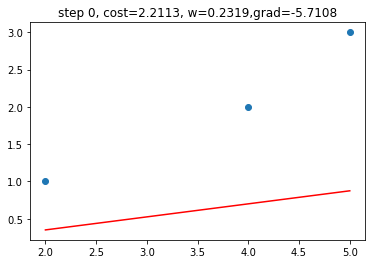

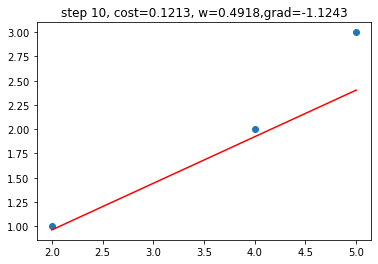

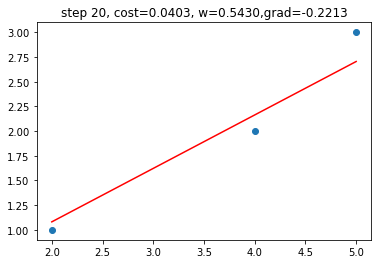

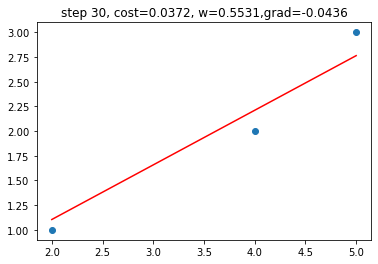

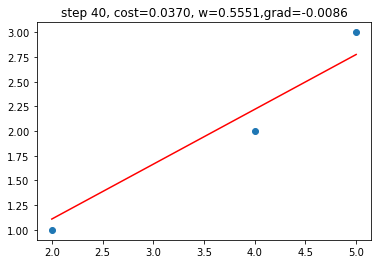

In [23]:

lr=0.01

for step in range(50):
    pred=x.mm(W)
    cost=cost_func(pred,y)
    gradient=(pred-y).view(-1).dot(x.view(-1)) / len(x)
    W-=lr*gradient
    
    if step % 10 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f, w=%.4f,grad=%.4f' %  (step,cost.data, W.data[0], gradient.data))
        plt.show()


## With nn Module

In [32]:
model=nn.Linear(1,1,bias=True)
print(model)

model.weight,model.bias

Linear(in_features=1, out_features=1, bias=True)


(Parameter containing:
 tensor([[0.5437]], requires_grad=True),
 Parameter containing:
 tensor([0.4874], requires_grad=True))

In [33]:
cost=nn.MSELoss()

In [34]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[0.5437]], requires_grad=True)
Parameter containing:
tensor([0.4874], requires_grad=True)


In [35]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)


In [36]:
model(x)

tensor([[1.5749],
        [2.6623],
        [3.2061]], grad_fn=<AddmmBackward0>)

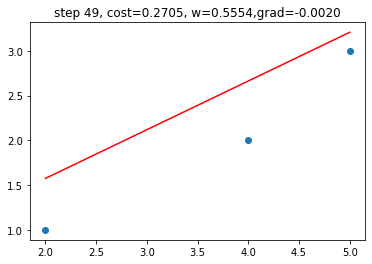

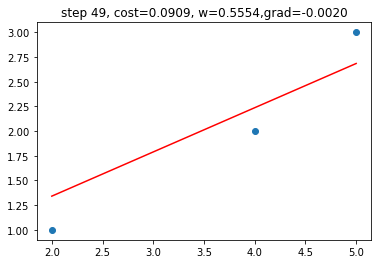

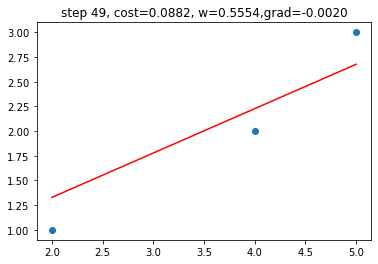

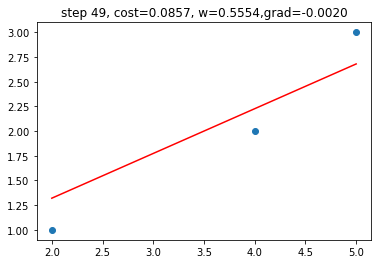

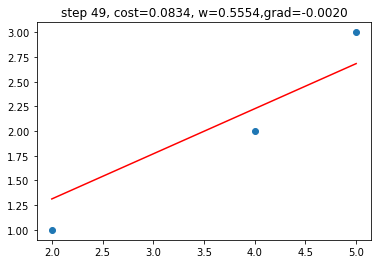

In [37]:
for i in range(50):
    pred=model(x)
    cost = cost_func(pred,y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if i % 10 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f, w=%.4f,grad=%.4f' %  (step,cost.data, W.data[0], gradient.data))
        plt.show()
        